# **Técnicas de Clasificación para Evaluación de Desempeño Sin Normalización**

## **Introducción**

En este notebook, implementaremos un modelo de clasificación para la **evaluación del desempeño de empleados** utilizando el algoritmo **K-Nearest Neighbors (KNN)** sin aplicar normalización a las características. La tarea consiste en evaluar el modelo en dos escenarios: **con normalización de datos** (realizado en otro notebook) y **sin normalización de datos** (este notebook).

El objetivo principal es entrenar y evaluar el modelo utilizando los datos en su escala original, lo que nos permitirá observar el impacto de no realizar normalización en el rendimiento del modelo.


## Objetivo

- Implementar y evaluar un modelo de clasificación multiclase utilizando KNN.
- Comparar los resultados con la versión que utiliza normalización y analizar las diferencias.


## Descripción del Dataset

El dataset utilizado contiene información detallada sobre empleados, sus características, y su desempeño evaluado en tres categorías:
- **"Alto"**
- **"Bajo"**
- **"Medio"**

### Columnas del Dataset
1. **`id_empleado`**: Identificador único de cada empleado.
2. **`genero`**: Género del empleado (e.g., "Masculino", "Femenino").
3. **`nivel_educativo`**: Nivel de educación alcanzado (e.g., "Secundaria", "Universidad").
4. **`departamento`**: Departamento al que pertenece el empleado.
5. **`cumplimiento_kpi`**: Nivel de cumplimiento de los indicadores clave de desempeño.
6. **`puntaje_productividad`**: Calificación de productividad.
7. **`colaboracion_equipo`**: Indicador de colaboración en equipo.
8. **`puntaje_iniciativa`**: Puntaje asignado a la iniciativa del empleado.
9. **`satisfaccion_laboral`**: Nivel de satisfacción laboral.
10. **`balance_trabajo_vida`**: Indicador de balance entre trabajo y vida personal.
11. **`horas_capacitacion`**: Número de horas dedicadas a capacitación.
12. **`puntaje_feedback_lider`**: Puntaje basado en el feedback recibido del líder.
13. **`categoria_desempeno`**: Variable objetivo que clasifica el desempeño en **"Alto"**, **"Medio"**, y **"Bajo"**.

## Tareas Realizadas en este Notebook
1. **Carga y Exploración de Datos:**
   - Identificar distribuciones y posibles desequilibrios en las clases.
2. **Preprocesamiento de Datos:**
   - Codificación de variables categóricas.
3. **Entrenamiento del Modelo:**
   - Implementación de KNN
4. **Evaluación del Modelo:**
   - Métricas: Precisión, Recall, F1-Score.
   - Matriz de Confusión.
5. **Visualización:**
   - Análisis de la matriz de confusión y errores entre clases.


### Importar Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Carga de Datos

In [ ]:
# Cargar el dataset
data = pd.read_csv('dataset_desempeno_empleados.csv')

# Vista inicial del dataset
print("Vista inicial del dataset:")
data.head()

Vista inicial del dataset:


,id_empleado,edad,genero,nivel_educativo,departamento,cumplimiento_kpi,puntaje_productividad,colaboracion_equipo,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,promocion_ultimos_2_anos,categoria_desempeno
0,E0001,50,Femenino,Licenciatura,Finanzas,50.138530,84.868594,Alto,77.928530,7.987470,Alto,22.180836,1.118762,0,Medio
1,E0002,36,Femenino,Licenciatura,TI,92.082792,67.130362,Alto,93.044435,7.025172,Medio,17.028769,4.204244,1,Bajo
2,E0003,29,Masculino,Secundaria,TI,88.923789,74.998160,Medio,60.707074,10.017144,Alto,45.051107,2.000958,0,Bajo
3,E0004,42,Femenino,Doctorado,Ventas,90.960241,55.939379,Medio,93.436203,7.936754,Medio,18.024769,2.409339,0,Alto
4,E0005,40,Femenino,Maestría,Ventas,100.279262,49.921690,Medio,31.190849,6.027687,Alto,26.831652,1.307658,0,Medio



## Exploración del Dataset

### Información General del Dataset

En esta sección, exploramos las características generales del dataset para comprender su estructura y las variables disponibles. Usamos el método `data.info()` para obtener un resumen que incluye:

1. **Número de entradas (filas):** Cantidad total de registros en el dataset.
2. **Número de columnas:** Total de características (variables) incluidas en el dataset.
3. **Nombre y tipo de cada columna:** Identificación de cada columna y su tipo de datos (e.g., `int64`, `float64`, `object`).
4. **Valores no nulos:** Cantidad de datos válidos en cada columna, lo que permite detectar posibles valores faltantes.

Este análisis es fundamental para identificar:
- **Características categóricas o numéricas** que pueden necesitar preprocesamiento.
- **Valores faltantes** que podrían requerir técnicas de imputación.
- La estructura general del dataset, que guía las etapas posteriores del análisis.

In [ ]:
print("\nInformación del dataset:")
data.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_empleado               3000 non-null   object 
 1   edad                      3000 non-null   int64  
 2   genero                    3000 non-null   object 
 3   nivel_educativo           3000 non-null   object 
 4   departamento              3000 non-null   object 
 5   cumplimiento_kpi          3000 non-null   float64
 6   puntaje_productividad     3000 non-null   float64
 7   colaboracion_equipo       3000 non-null   object 
 8   puntaje_iniciativa        3000 non-null   float64
 9   satisfaccion_laboral      3000 non-null   float64
 10  balance_trabajo_vida      3000 non-null   object 
 11  horas_capacitacion        3000 non-null   float64
 12  puntaje_feedback_lider    3000 non-null   float64
 13  promocion_ultimos_2_anos  3000 non-nu

## Comprobación de Valores Nulos

Verificamos si el dataset contiene valores nulos en alguna de sus columnas. Esto es crucial para determinar si es necesario realizar imputaciones o eliminar registros con datos faltantes.


In [ ]:
# Comprobación de valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
id_empleado                 0
edad                        0
genero                      0
nivel_educativo             0
departamento                0
cumplimiento_kpi            0
puntaje_productividad       0
colaboracion_equipo         0
puntaje_iniciativa          0
satisfaccion_laboral        0
balance_trabajo_vida        0
horas_capacitacion          0
puntaje_feedback_lider      0
promocion_ultimos_2_anos    0
categoria_desempeno         0
dtype: int64


# **Exploración de Datos (EDA)**

## **Variables Categóricas: Conteo y Visualización**

### **Identificación y Conteo de Valores para Variables Categóricas**

Este código identifica las columnas categóricas del dataset utilizando su tipo de dato (`object`) y muestra la distribución de valores únicos para cada una. Esto permite analizar la frecuencia de las categorías en cada columna.


In [ ]:
# Identificar variables categóricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

# Conteo de valores para variables categóricas
for col in columnas_categoricas:
    print(f"\nDistribución de valores para {col}:")
    print(data[col].value_counts())



Distribución de valores para id_empleado:
id_empleado
E0001    3
E0672    3
E0659    3
E0660    3
E0661    3
        ..
E0339    3
E0340    3
E0341    3
E0342    3
E1000    3
Name: count, Length: 1000, dtype: int64

Distribución de valores para genero:
genero
Femenino     1413
Masculino    1302
Otro          285
Name: count, dtype: int64

Distribución de valores para nivel_educativo:
nivel_educativo
Licenciatura    1155
Secundaria       882
Maestría         807
Doctorado        156
Name: count, dtype: int64

Distribución de valores para departamento:
departamento
TI                  633
Ventas              630
Marketing           624
Finanzas            558
Recursos Humanos    555
Name: count, dtype: int64

Distribución de valores para colaboracion_equipo:
colaboracion_equipo
Medio    1152
Bajo      975
Alto      873
Name: count, dtype: int64

Distribución de valores para balance_trabajo_vida:
balance_trabajo_vida
Medio    1518
Bajo      789
Alto      693
Name: count, dtype: int64

Di

## **Visualización de Variables Categóricas con `countplot`**

Este código genera gráficos de barras (`countplot`) que muestran la distribución de las categorías en cada columna categórica del dataset. Se crean subplots para cada variable categórica, organizados en una cuadrícula para visualizar todas las distribuciones de manera compacta.


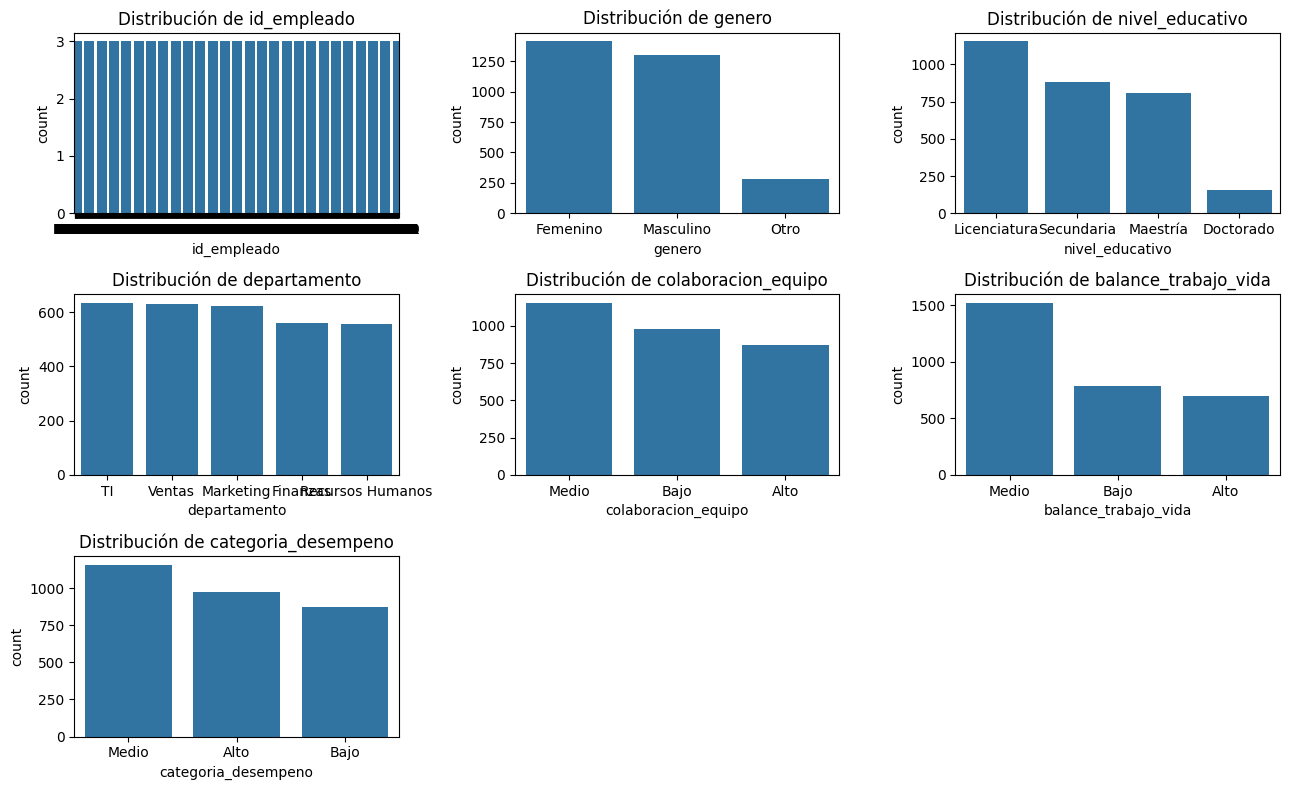

In [ ]:
# Visualización con countplot
plt.figure(figsize=(13, 8))
for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

## **Variables Numéricas: Resumen Estadístico y Visualización**

### **Resumen Estadístico de las Variables Numéricas**

Este código genera un resumen estadístico de las columnas numéricas del dataset, mostrando métricas como la media, desviación estándar, valores mínimos, máximos, y percentiles.


In [ ]:
# Resumen estadístico
print("Resumen estadístico de las variables numéricas:")
data.describe()

Resumen estadístico de las variables numéricas:


,edad,cumplimiento_kpi,puntaje_productividad,puntaje_iniciativa,satisfaccion_laboral,horas_capacitacion,puntaje_feedback_lider,promocion_ultimos_2_anos
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,40.947000,75.226870,75.133801,64.547074,5.467610,24.959823,3.007852,0.186000
std,11.157136,14.681471,14.480844,20.498561,2.995337,14.332224,1.152697,0.389172
min,22.000000,49.606952,49.698262,29.569221,0.921927,-0.355372,0.969822,0.000000
25%,31.000000,62.938815,63.801056,47.037645,2.985608,12.797965,2.023936,0.000000
50%,42.000000,74.983714,74.531845,63.001952,5.068726,24.897519,3.002555,0.000000
75%,50.000000,88.191218,87.926565,82.900253,8.016227,37.224979,3.924241,0.000000
max,59.000000,100.279262,100.490825,100.403814,10.082500,49.369411,5.024133,1.000000


### **Visualización y Análisis de Simetría de las Variables Numéricas**

Este código calcula la **simetría** (o "skewness") de cada variable numérica del dataset. La simetría mide el grado de asimetría en la distribución de los datos, ayudándonos a identificar si los datos están sesgados hacia la izquierda, derecha, o son simétricos.

### **Interpretación de la Simetría:**

- **Simetría cercana a 0:** La distribución es aproximadamente simétrica (similar a una distribución normal).
- **Simetría positiva (> 0):** La distribución está sesgada a la derecha; tiene una "cola larga" hacia los valores mayores.
- **Simetría negativa (< 0):** La distribución está sesgada a la izquierda; tiene una "cola larga" hacia los valores menores.

In [ ]:
columnas_numericas = data.select_dtypes(include=['float64', 'int64']).columns

# Simetría
for col in columnas_numericas:
    skewness = data[col].skew()
    print(f"Simetría de {col}: {skewness:.2f}")

Simetría de edad: -0.09
Simetría de cumplimiento_kpi: -0.02
Simetría de puntaje_productividad: 0.02
Simetría de puntaje_iniciativa: 0.09
Simetría de satisfaccion_laboral: -0.01
Simetría de horas_capacitacion: 0.00
Simetría de puntaje_feedback_lider: -0.03
Simetría de promocion_ultimos_2_anos: 1.61


Este código genera histogramas para cada columna numérica del dataset, añadiendo una curva de densidad (KDE) que facilita la interpretación de la distribución de los datos.


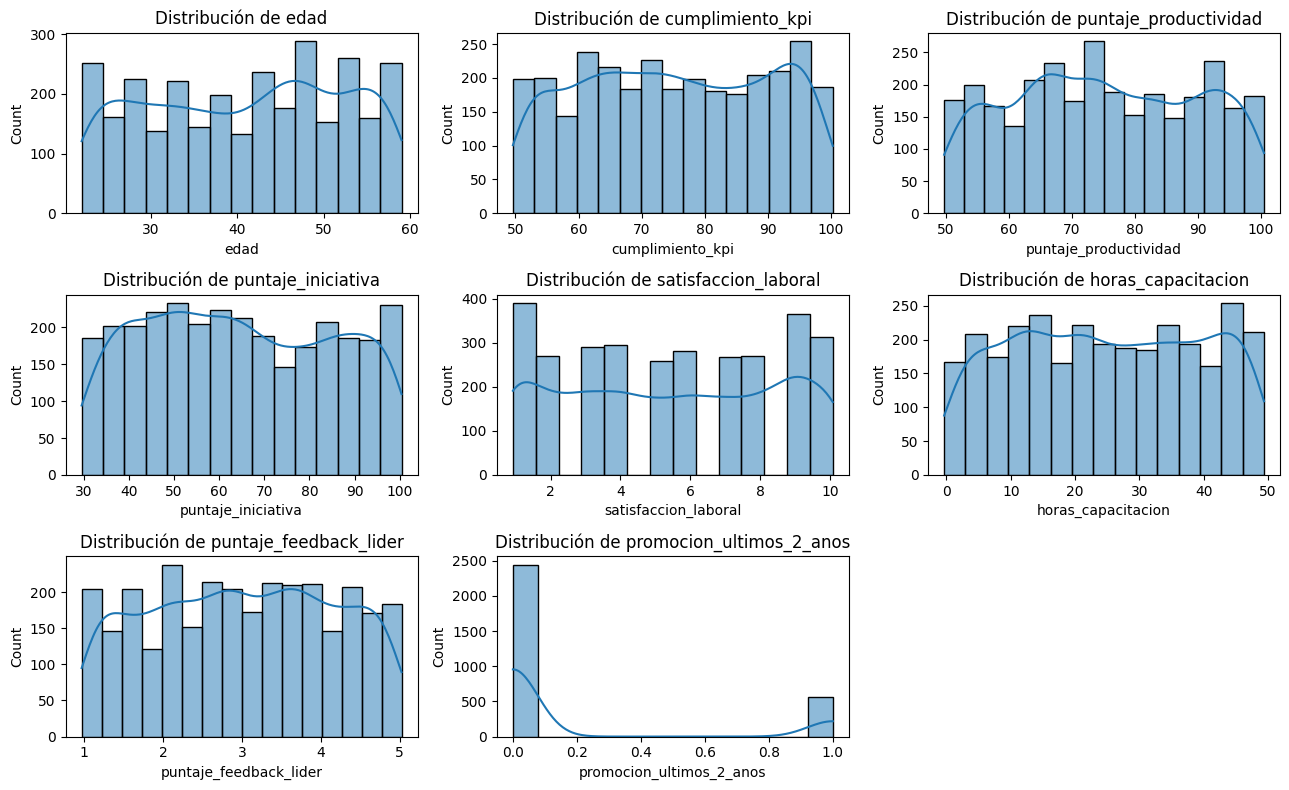

In [ ]:
plt.figure(figsize=(13, 8))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

### **Boxplot (Gráfico de Caja y Bigotes)**

Un boxplot (o gráfico de caja y bigotes) es una herramienta de visualización que resume la distribución de un conjunto de datos numéricos y resalta posibles valores atípicos. Incluye los siguientes componentes:

- **Caja (box):** Representa el rango intercuartil (IQR), es decir, el rango entre el primer cuartil (Q1, 25%) y el tercer cuartil (Q3, 75%).
- **Línea central:** Indica la mediana (percentil 50%) de los datos.
- **Bigotes (whiskers):** Extienden hasta los valores que están dentro de 1.5 veces el IQR desde Q1 y Q3.
- **Puntos fuera de los bigotes:** Representan valores atípicos.

#### Interpretación de los Boxplots:
- **Valores Atípicos:**
  - Los puntos fuera de los bigotes son valores atípicos que podrían requerir tratamiento (por ejemplo, eliminación o transformación) si impactan negativamente en el análisis o el modelo.
  
- **Distribución de los Datos:**
  - Una **caja simétrica** indica una distribución equilibrada.
  - Una **caja desplazada** o bigotes desiguales pueden indicar sesgos.

- **Rango Intercuartil (IQR):**
  - Un **IQR amplio** sugiere una alta dispersión en los datos.
  - Un **IQR estrecho** sugiere que la mayoría de los datos están concentrados alrededor de la mediana.

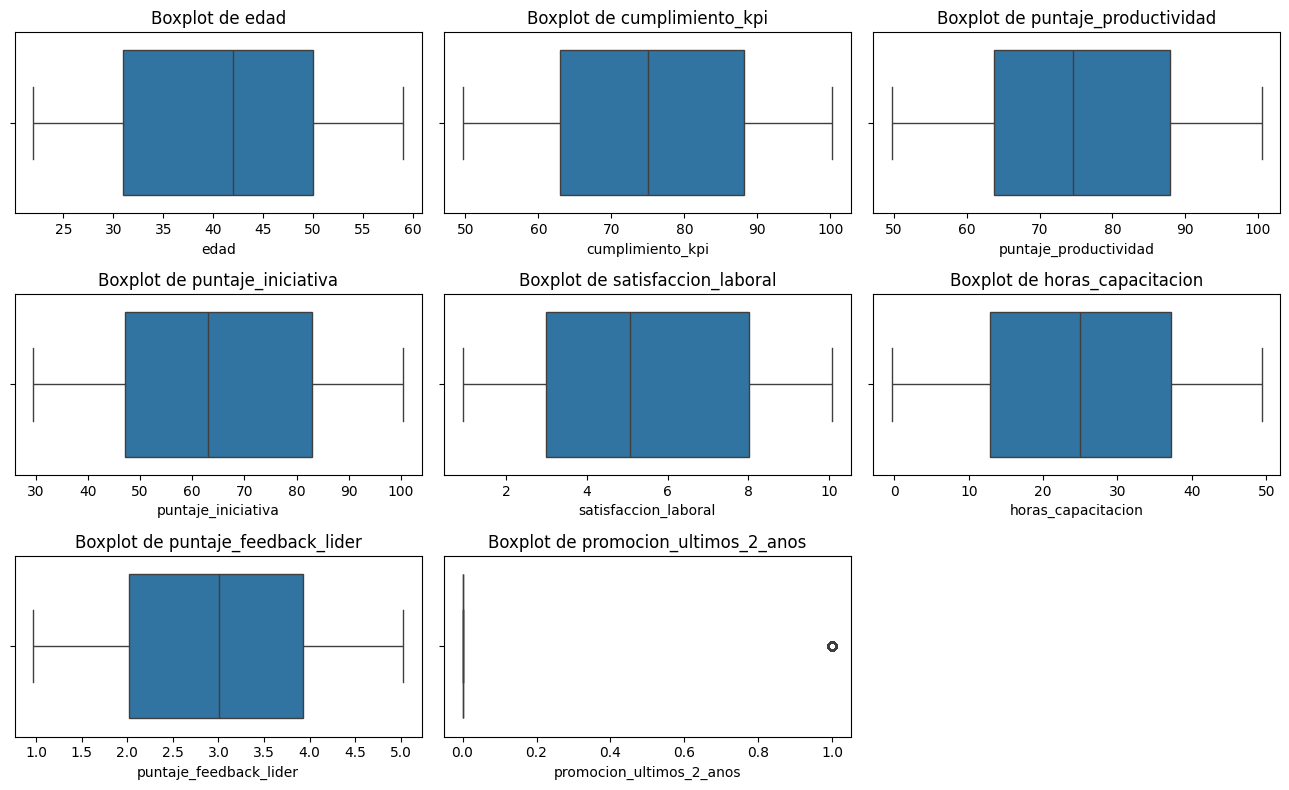

In [ ]:
# Boxplot para detectar valores atípicos
plt.figure(figsize=(13, 8))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x=col)
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


## **Transformación de Variables**

Este código utiliza `LabelEncoder` para transformar la variable categórica `categoria_desempeno` en valores numéricos. Esto es útil para convertir categorías en un formato que los modelos de machine learning puedan interpretar.

- **LabelEncoder:** Una herramienta que transforma valores categóricos en etiquetas numéricas. Por ejemplo, convierte valores como `"Alto"`, `"Medio"`, `"Bajo"` en números enteros.

- **fit_transform:** Realiza dos pasos simultáneamente:
  1. Aprende automáticamente todas las categorías presentes en la columna `categoria_desempeno`.
  2. Asigna un número entero único a cada categoría, respetando un orden interno. Por ejemplo:
     - Si las categorías son `"Alto"`, `"Bajo"` y `"Medio"`, el resultado podría ser:
       - `"Alto"` → `0`
       - `"Bajo"` → `1`
       - `"Medio"` → `2`


In [ ]:
label_encoder = LabelEncoder()
data['categoria_desempeno'] = label_encoder.fit_transform(data['categoria_desempeno'])



Este fragmento de código transforma columnas categóricas en valores numéricos utilizando `LabelEncoder`.

 Este proceso es fundamental cuando trabajamos con datos que incluyen texto, como `"Masculino"` y `"Femenino"`, o categorías como `"Secundaria"` y `"Universidad"`.

Primero, se seleccionan las columnas categóricas de interés, como `"genero"`, `"nivel_educativo"`, `"departamento"`, `"colaboracion_equipo"`, y `"balance_trabajo_vida"`.

Luego, para cada una de estas columnas, `LabelEncoder` se utiliza para asignar un número entero único a cada categoría dentro de la columna. Por ejemplo:
- En la columna `"genero"`, las categorías `"Masculino"` y `"Femenino"` podrían transformarse en `0` y `1`, respectivamente.
- En `"nivel_educativo"`, valores como `"Secundaria"`, `"Universidad"`, y `"Postgrado"` podrían asignarse como `0`, `1`, y `2`.


In [ ]:
columnas_categoricas = ['genero', 'nivel_educativo', 'departamento',
                       'colaboracion_equipo', 'balance_trabajo_vida']

for col in columnas_categoricas:
    data[col] = LabelEncoder().fit_transform(data[col])

En este paso, separamos los datos en dos conjuntos: las características independientes (**X**) y la variable objetivo (**y**).


In [ ]:
X = data.drop(columns=['id_empleado', 'categoria_desempeno'])
y = data['categoria_desempeno']

In [ ]:
#Visualizamos las datos de X
X.head()

,edad,genero,nivel_educativo,departamento,cumplimiento_kpi,puntaje_productividad,colaboracion_equipo,puntaje_iniciativa,satisfaccion_laboral,balance_trabajo_vida,horas_capacitacion,puntaje_feedback_lider,promocion_ultimos_2_anos
0,50,0,1,0,50.138530,84.868594,0,77.928530,7.987470,0,22.180836,1.118762,0
1,36,0,1,3,92.082792,67.130362,0,93.044435,7.025172,2,17.028769,4.204244,1
2,29,1,3,3,88.923789,74.998160,2,60.707074,10.017144,0,45.051107,2.000958,0
3,42,0,0,4,90.960241,55.939379,2,93.436203,7.936754,2,18.024769,2.409339,0
4,40,0,2,4,100.279262,49.921690,2,31.190849,6.027687,0,26.831652,1.307658,0


In [ ]:
#Visualizamos las datos de Y
y.head()

,categoria_desempeno
0,2
1,1
2,1
3,0
4,2


## **División en Conjuntos de Entrenamiento y Prueba**

Separamos el dataset en **cuatro conjuntos**: las características de entrenamiento (**X_train**) y de prueba (**X_test**), y las etiquetas correspondientes (**y_train** y **y_test**). Este proceso es fundamental para evaluar cómo el modelo generaliza a datos no utilizados durante el entrenamiento.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Implementación del Modelo de Clasificación**

### **Entrenamiento de los modelos**

## **Regresión Logística**

### **¿Qué es la Regresión Logística?**

La regresión logística es un algoritmo de aprendizaje supervisado utilizado para tareas de clasificación. Su objetivo es predecir la probabilidad de pertenencia de una observación a una clase específica. Aunque su nombre incluye el término 'regresión', se emplea principalmente para problemas de clasificación binaria.

### **¿Por qué usar la Regresión Logística?**

1. **Interpretabilidad:** Fácil de entender e interpretar los coeficientes.  
2. **Eficiencia:** Funciona bien en problemas linealmente separables.  
3. **Probabilidades de Salida:** Proporciona probabilidades en lugar de solo etiquetas de clase.  
4. **Generalización:** Es menos propensa al sobreajuste si se aplica regularización.  

### **Fórmula Matemática**

La función logística (sigmoide) se define como:

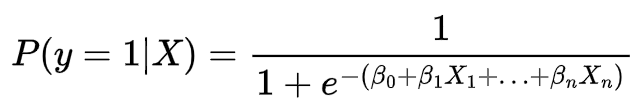

donde:
- P(y=1|X) es la probabilidad de que la clase sea 1 dado (X).  
- β0, β1,....,βn son los coeficientes del modelo.

In [ ]:
# Crear y entrenar el modelo
modelo_logistica = LogisticRegression()
modelo_logistica.fit(X_train, y_train)
# Hacer predicciones
y_pred_logistica = modelo_logistica.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Evaluación del Modelo y Visualización de la Matriz de Confusión**

Evaluamos el rendimiento del modelo utilizando el reporte de clasificación y la matriz de confusión.

Estas herramientas proporcionan información detallada sobre cómo el modelo realiza predicciones y dónde pueden estar los errores.

In [ ]:
# Evaluar el modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_logistica))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.45      0.26      0.33       211
           1       0.29      0.12      0.17       164
           2       0.38      0.70      0.50       225

    accuracy                           0.39       600
   macro avg       0.37      0.36      0.33       600
weighted avg       0.38      0.39      0.35       600



In [ ]:
print("Precisión:", accuracy_score(y_test, y_pred_logistica))

Precisión: 0.38666666666666666


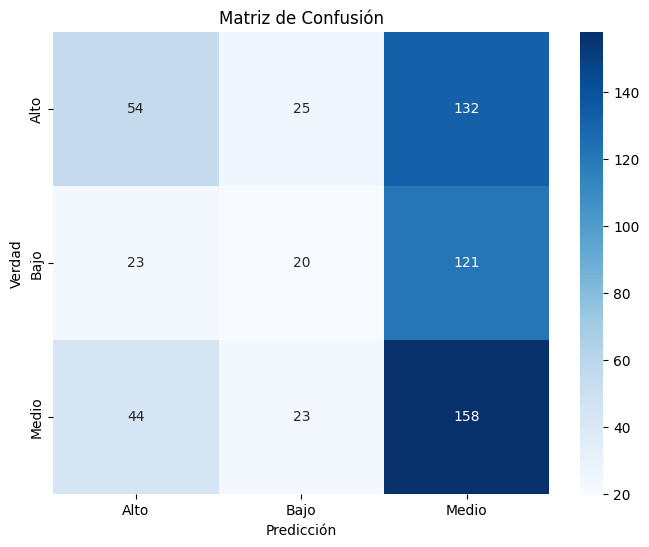

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_logistica)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

## **Support Vector Machine (SVM)**

### **Descripción**
El **Support Vector Machine (SVM)** es un algoritmo de aprendizaje supervisado utilizado principalmente para clasificación, aunque también puede ser usado para regresión. Su objetivo es encontrar un hiperplano en un espacio multidimensional que separe las clases de datos de manera óptima. El SVM intenta maximizar el margen entre las clases, lo que generalmente resulta en una mejor generalización en datos no vistos.

### **Funcionamiento**
1. **Separación Lineal**: SVM busca un hiperplano que divida las clases en el espacio de características.
2. **Margen Máximo**: El modelo optimiza el margen entre las muestras más cercanas de cada clase, conocidas como **vectores de soporte**.
3. **Kernels**: Si los datos no son linealmente separables, se puede usar una función kernel para mapear los datos a un espacio de mayor dimensión donde la separación sea posible. Algunos kernels comunes son:
   - Lineal
   - Polinómico
   - Radial Basis Function (RBF)
   - Sigmoide

### **Componentes Principales**
- **Hiperplano**: El límite que separa las clases.
- **Vectores de Soporte**: Son los puntos más cercanos al hiperplano y son clave para definir la posición y el margen del mismo.
- **Márgenes**: La distancia entre el hiperplano y los vectores de soporte. SVM busca maximizar esta distancia.

### **Ventajas**
- Es eficaz en espacios de alta dimensión.
- Es robusto frente a overfitting, especialmente en conjuntos de datos de alta dimensión.
- Utiliza un margen para clasificar, lo que mejora la generalización.

### **Desventajas**
- El tiempo de entrenamiento puede ser largo para conjuntos de datos grandes.
- No es eficiente cuando hay mucho ruido (superposición de clases).
- El ajuste de los hiperparámetros (como C y el tipo de kernel) puede ser desafiante.

### **Parámetros Comunes**
- **C**: Controla el margen de error en el modelo. Un valor alto de C permite una menor tolerancia al error, mientras que un valor bajo de C permite más error.
- **kernel**: Especifica el tipo de kernel que se utilizará (lineal, polinómico, RBF, etc.).
- **gamma**: Solo aplicable a kernels no lineales, como RBF. Controla la influencia de un solo punto de datos.


In [ ]:
# Crear y entrenar el modelo
modelo_svc = SVC(kernel='linear')
modelo_svc.fit(X_train, y_train)

# Hacer predicciones
y_pred_svc = modelo_svc.predict(X_test)

### **Evaluación del Modelo y Visualización de la Matriz de Confusión**

Evaluamos el rendimiento del modelo utilizando el reporte de clasificación y la matriz de confusión.

Estas herramientas proporcionan información detallada sobre cómo el modelo realiza predicciones y dónde pueden estar los errores.

In [ ]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_svc, zero_division=0))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.00      0.00      0.00       164
           2       0.38      1.00      0.55       225

    accuracy                           0.38       600
   macro avg       0.12      0.33      0.18       600
weighted avg       0.14      0.38      0.20       600



In [ ]:
print("Precisión:", accuracy_score(y_test, y_pred_svc))

Precisión: 0.375


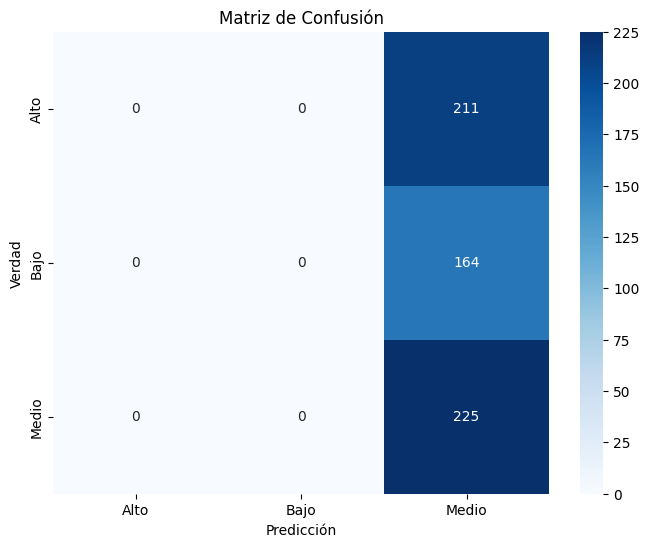

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

### ¿Qué es K-Nearest Neighbors (KNN)?

K-Nearest Neighbors (KNN) es un algoritmo de machine learning supervisado utilizado para clasificación y regresión. Es uno de los algoritmos más simples pero efectivos, basado en el principio de proximidad. Su funcionamiento se centra en identificar los **k vecinos más cercanos** a un punto de datos nuevo y asignarle una clase (en clasificación) o predecir un valor (en regresión) basándose en esos vecinos.


#### Funcionamiento del KNN:

1. **Cálculo de distancias:**
   - Cuando se recibe un dato nuevo, el algoritmo calcula la distancia entre este dato y todos los puntos en el conjunto de entrenamiento.
   - Las distancias comunes utilizadas son:

     - Distancia Euclidiana (p=2):

     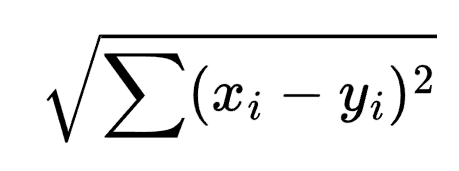

     - Distancia Manhattan (p=1):

     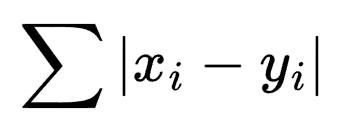

2. **Identificación de vecinos:**
   - Ordena los datos del conjunto de entrenamiento en función de la distancia calculada.
   - Selecciona los **k vecinos más cercanos** (donde \(k\) es un hiperparámetro definido por el usuario).

3. **Decisión basada en los vecinos:**
   - En clasificación: Se asigna la clase más frecuente entre los \(k\) vecinos (mayoría).
   - En regresión: Se predice el valor promedio de los \(k\) vecinos.

### Beneficios de KNN:
- **Simplicidad:** Es fácil de entender e implementar.
- **Adaptabilidad:** No hace supuestos sobre la distribución de los datos.
- **Versatilidad:** Funciona bien tanto en problemas de clasificación como de regresión.

### Limitaciones de KNN:
- **Sensibilidad a la escala:** Requiere normalización de las características para evitar que variables con mayores valores dominen.
- **Eficiencia:** Puede ser computacionalmente costoso con datasets grandes, ya que calcula distancias para cada punto.
- **Dependencia del hiperparámetro \(k\):** El rendimiento depende de la elección adecuada de \(k\).

In [ ]:
# Entrenar y evaluar KNN con normalización
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### **Evaluación del Modelo y Visualización de la Matriz de Confusión**

Evaluamos el rendimiento del modelo utilizando el reporte de clasificación y la matriz de confusión.

Estas herramientas proporcionan información detallada sobre cómo el modelo realiza predicciones y dónde pueden estar los errores.


In [ ]:
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

        Alto       0.97      0.96      0.96       211
        Bajo       0.96      0.98      0.97       164
       Medio       0.97      0.97      0.97       225

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [ ]:
print(f"Precisión: {accuracy_score(y_test, y_pred_knn):.3f}")

Precisión: 0.970


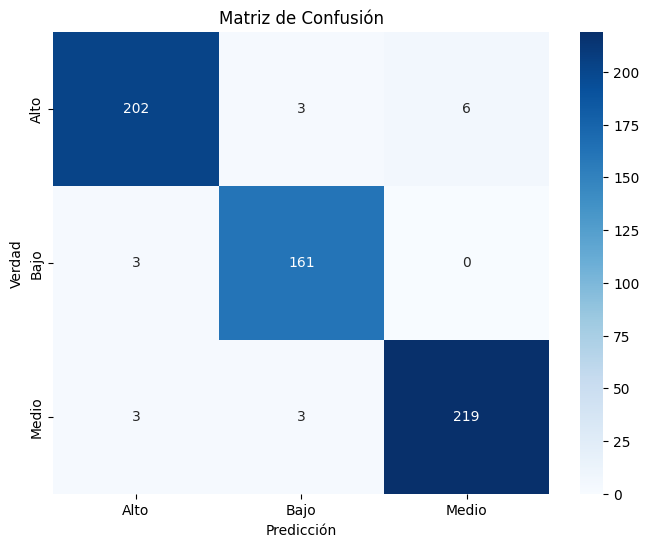

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Matriz de Confusión")
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

### **Comparación de Modelos por Precisión**

En esta sección comparamos tres modelos de clasificación: Regresión Logística, Support Vector Machine (SVM) y K-Nearest Neighbors (KNN). Se evalúan en función de su precisión para determinar cuál ofrece el mejor rendimiento en el conjunto de datos.


In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_logistica)
accuracy_svm = accuracy_score(y_test, y_pred_svc)
accuray_knn = accuracy_score(y_test, y_pred_knn)

print("Precisión Regresión Logística:", accuracy_lr)
print("Precisión SVM:", accuracy_svm)
print("Precisión KNN:", accuray_knn)

Precisión Regresión Logística: 0.38666666666666666
Precisión SVM: 0.375
Precisión KNN: 0.97


### **Tabla de Resultados Reales vs Predichos**
Aquí visualizamos una tabla que compara los valores reales con las predicciones del modelo KNN, el cual ha mostrado el mejor desempeño en términos de precisión en este caso específico.


In [ ]:
resultados = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred_knn
})

resultados

,Real,Predicción
1801,1,1
1190,0,0
1817,0,0
251,0,0
2505,2,2
...,...,...
104,1,1
2087,2,2
599,0,0
1756,2,2
